### 把多项式回归代入逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
X = np.random.normal(0,1,size = (200,2))
y = np.array(X[:,0]**2 + X[:,1]**2 < 1.5,dtype='int')

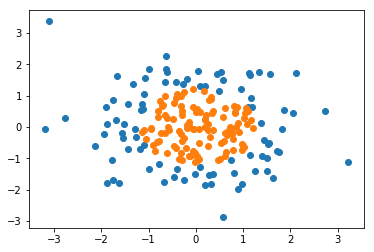

In [2]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

### 逻辑回归

In [4]:
from ML.LogisticRegression import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)
log_reg.score(X,y)#太低了

0.605

In [16]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(#meshgrid,用向量生成坐标矩阵
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]#ravel遍历，c_(合并)降维
    y_predict = model.predict(X_new)
    boundary = y_predict.reshape(x0.shape)
    #ListedColormap,生成非渐变的颜色映射
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,boundary,cmap=custom_cmap)

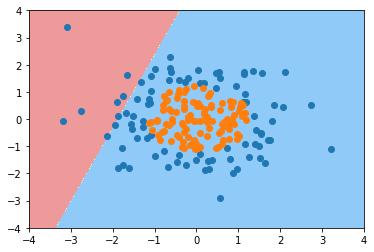

In [17]:
plot_decision_boundary(log_reg,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [18]:
## 使用管道
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

#构造管道
def PloynomialLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression())
    ])

In [19]:
poly_log_reg = PloynomialLogisticRegression(degree=2)
poly_log_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

In [20]:
poly_log_reg.score(X,y)

0.95

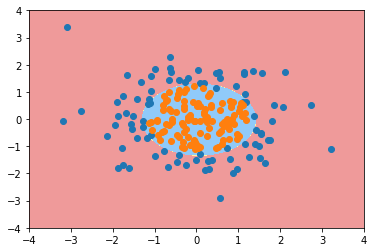

In [21]:
plot_decision_boundary(poly_log_reg,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

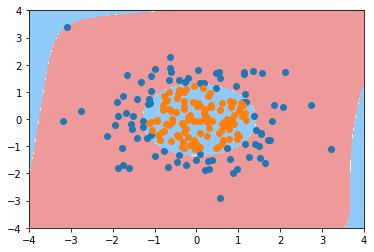

In [22]:
#####degree=20
poly_log_reg = PloynomialLogisticRegression(degree=20)
poly_log_reg.fit(X,y)
plot_decision_boundary(poly_log_reg,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()####过拟合

## 模型正则化
把C看作α的倒数，sklearn中强制让我们使用正则

$J(θ) = J(θ)+αL_{1} = C·J(θ)+L_{1}$

$J(θ) = J(θ)+αL_{2} = C·J(θ)+L_{2}$

### 使用sklearn中的逻辑回归和正则化

In [24]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
X = np.random.normal(0,1,size = (200,2))
y = np.array(X[:,0]**2 + X[:,1] < 1.5,dtype='int')#把boolean转化为int
for _ in range(20):#把20个点强制转换为1，添加噪音
    y[np.random.randint(200)] = 1

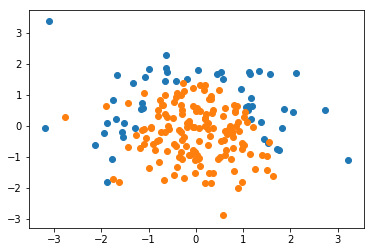

In [25]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)
from sklearn.linear_model import LogisticRegression

####  sklearn中的简单逻辑回归

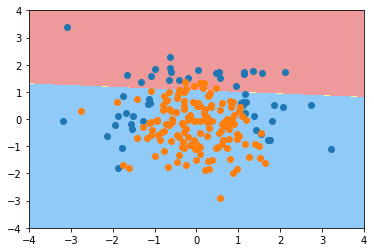

In [27]:
##简单逻辑回归
log_reg2 = LogisticRegression()
log_reg2.fit(X_train,y_train)
plot_decision_boundary(log_reg2,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()####过拟合

####  sklearn中的多项式逻辑回归

In [28]:
##构造管道
def PloynomialLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression())
    ])

0.92


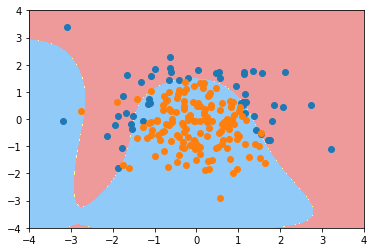

In [31]:
poly_log_reg2 = PloynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train,y_train)
print(poly_log_reg2.score(X_test,y_test))
plot_decision_boundary(poly_log_reg2,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()####过拟合

####   使用模型正则化

In [33]:
##使用模型正则化
##构造管道
def PloynomialLogisticRegression2(degree,C):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('log_reg',LogisticRegression(C=C))
    ])

0.92


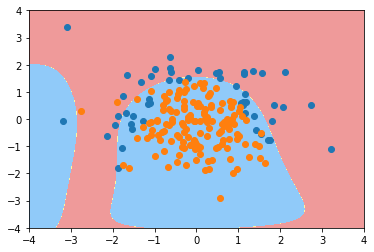

In [40]:
poly_log_reg3 = PloynomialLogisticRegression2(degree=20,C=0.1)
poly_log_reg3.fit(X_train,y_train)
print(poly_log_reg3.score(X_test,y_test))
plot_decision_boundary(poly_log_reg3,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()####过拟合

### 使用C和penalty正则化

In [54]:
##构造管道
def PolynomialLogisticRegression3(degree, C, penalty='l2'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty))
    ])

0.9


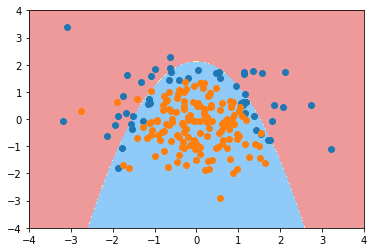

In [55]:
poly_log_reg4 = PolynomialLogisticRegression3(degree=20, C=0.1, penalty='l1')
poly_log_reg4.fit(X_train, y_train)
print(poly_log_reg4.score(X_test, y_test))
plot_decision_boundary(poly_log_reg4,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()